# Guía 1 - Arballo Facundo Nicolás - 105096

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

# Ejercicio 1

![](Enunciados/ej_1.png)

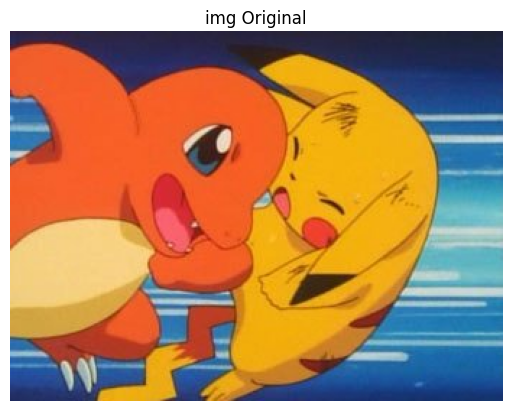

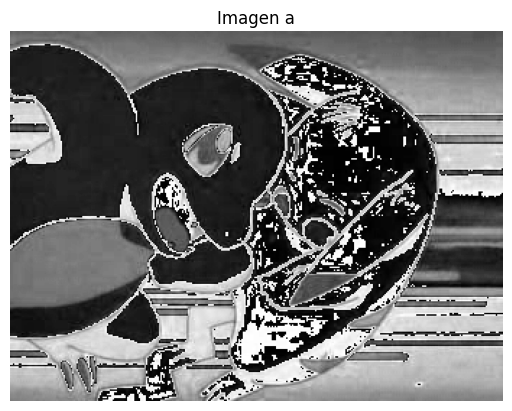

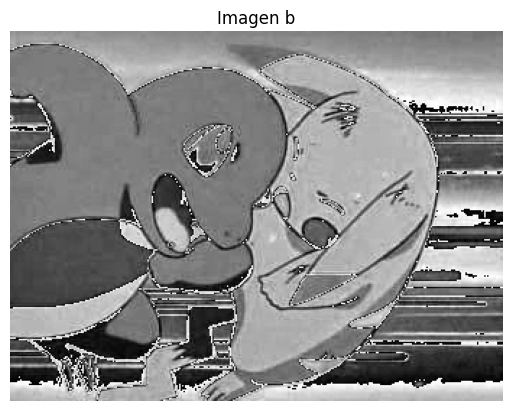

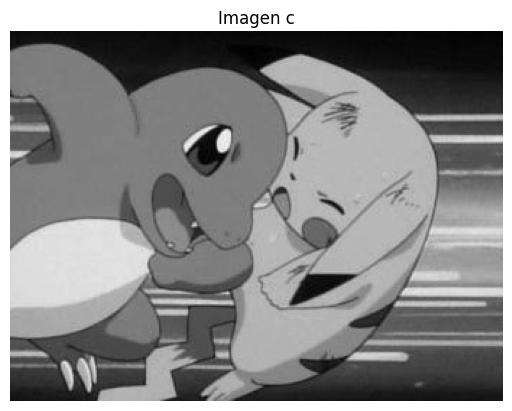

In [2]:
img = plt.imread('data/pikachu_vs_charmander.jpeg')
plt.imshow(img)
plt.title('img Original')
plt.axis('off')  # Ocultar los ejes
plt.show()

# Item A
# Pixel a pixel me quedo con el valor mínimo y máximo de color (axis = 2 es el canal de color)
# Devuelve matriz 2D con valor min/max del rgb
min_rgb = np.min(img, axis=2)
max_rgb = np.max(img, axis=2)

# Aplicar la fórmula para convertir a escala de grises
gray_img = (min_rgb + max_rgb) / 2

# Mostrar la imagen en escala de grises
plt.imshow(gray_img, cmap='gray')
plt.title("Imagen a")
plt.axis('off')  # Ocultar los ejes
plt.show()

# Item B
# Separo los canales de color
R = img[:, :, 0]
G = img[:, :, 1]
B = img[:, :, 2]

# Aplicar la fórmula para convertir a escala de grises
gray_img = (R + G + B) / 3

# Mostrar la imagen en escala de grises
plt.imshow(gray_img, cmap='gray')
plt.title("Imagen b")
plt.axis('off')  # Ocultar los ejes
plt.show()

# Item C
# Aplicar la fórmula matricialmente para convertir a escala de grises
coef = [0.3, 0.59, 0.11]
gray_img = img @ coef

# Mostrar la imagen en escala de grises
plt.imshow(gray_img, cmap='gray')
plt.title("Imagen c")
plt.axis('off')  # Ocultar los ejes
plt.show()


# Ejercicio 2

![](Enunciados/ej_2.png)

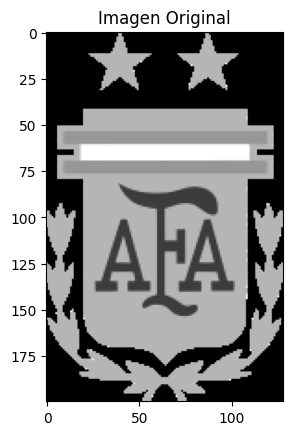

-------------------------- Item A - Letras --------------------------


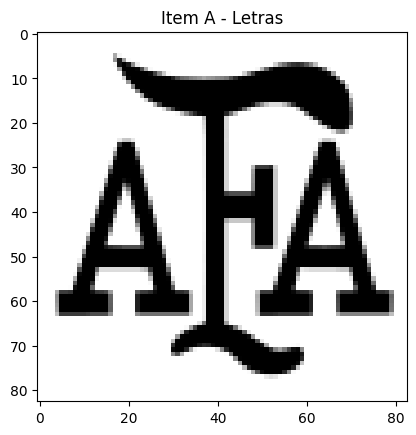

-------------------------- Item B - Estrellas --------------------------


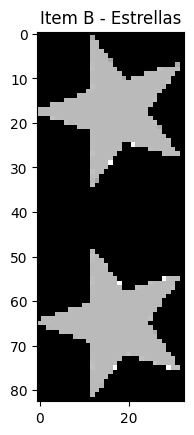

-------------------------- Item C - Máscara --------------------------


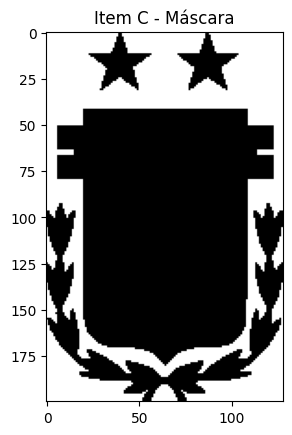

-------------------------- Item D - Color Fondo --------------------------


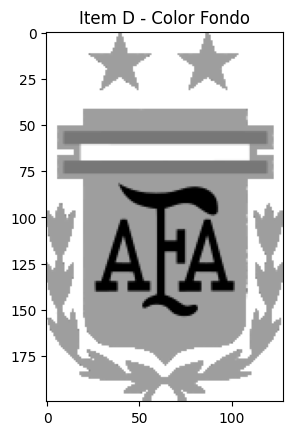

-------------------------- Item E - Espejar --------------------------


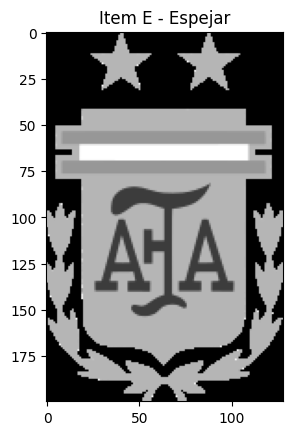

-------------------------- Item F - Grilla --------------------------


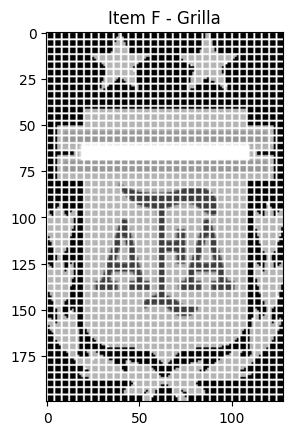

-------------------------- Item G - 3 Estrellas --------------------------


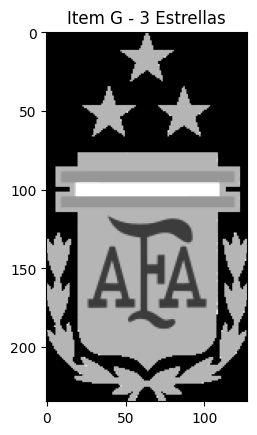

In [8]:
img = plt.imread('data/AFAlogo.bmp')

plt.imshow(img, cmap='gray')
plt.title("Imagen Original")
plt.show()

# -------------------------- Item A - Letras --------------------------
print("-------------------------- Item A - Letras --------------------------")
img_A = img[77:160, 22:105]
plt.imshow(img_A, cmap='gray')
plt.title("Item A - Letras")
plt.show()

# -------------------------- Item B - Estrellas --------------------------
print("-------------------------- Item B - Estrellas --------------------------")
img_B = img[0:33, 22:105].T
plt.imshow(img_B, cmap='gray')
plt.title("Item B - Estrellas")
plt.show()

# -------------------------- Item C - Máscara --------------------------
print("-------------------------- Item C - Máscara --------------------------")
# img == 0 (condicion), 255 (valor si es True), 0 (valor si es False) - astype uint8 para que los valores estén entre 0 y 255
img_C = np.where(img == 0, 255, 0).astype(np.uint8)
plt.imshow(img_C, cmap='gray')
plt.title("Item C - Máscara")
plt.show()

# -------------------------- Item D - Color Fondo --------------------------
print("-------------------------- Item D - Color Fondo --------------------------")
img_D = np.where(img == 0, 255, img).astype(np.uint8)
plt.imshow(img_D, cmap='gray')
plt.title("Item D - Color Fondo")
plt.show()

# -------------------------- Item E - Espejar --------------------------
print("-------------------------- Item E - Espejar --------------------------")
img_E = img[:, ::-1]
plt.imshow(img_E, cmap='gray')
plt.title("Item E - Espejar")
plt.show()

# -------------------------- Item F - Grilla --------------------------
print("-------------------------- Item F - Grilla --------------------------")
img_F = img.copy()
# ::4 = cada 4 elementos (filas o columnas) - 255 = blanco
# : = todas las filas o columnas
img_F[::4,:] = 255
img_F[:,::4] = 255
plt.imshow(img_F, cmap='gray')
plt.title("Item F - Grilla")
plt.show()

# -------------------------- Item G - 3 Estrellas --------------------------
print("-------------------------- Item G - 3 Estrellas --------------------------")
img_G = img.copy()
estrella = img[0:35, 20:60]

size_img = img.shape
size_estrella = estrella.shape

fila_estrella = np.zeros((size_estrella[0], size_img[1]))
fila_estrella[0:size_estrella[0], size_img[1]//2-size_estrella[1]//2:size_img[1]//2+size_estrella[1]//2] = estrella

img_G = np.vstack([fila_estrella, img_G])

plt.imshow(img_G, cmap='gray')
plt.title("Item G - 3 Estrellas")
plt.show()


# Ejercicio 3

![](Enunciados/ej_3.png)

Dado que $p_{XY}(x,y) = \frac{3}{5}$ solo en el intervalo $0<y<1+x^3$ se puede integrar esta en función de $y$ para obtener la función de densidad marginal $p_X(x)$:

$$p_X(x) = \int_{0}^{1+x^3}\frac{3}{5}dy = \frac{3}{5}(1+x^3) 1\{0<x<1\}$$

Ahora para hallar la función de densidad condicional se plantea:

$$p_{Y|X=x}(y)=\frac{p_{XY}(x,y)}{p_X(x)} = \frac{\frac{3}{5}}{\frac{3}{5}(1+x^3)}= \frac{1}{1+x^3} 1\{0<y<1+x^3\}$$

# Esperanza condicional

Se multiplica $y$ por la densidad condicional y se la integra en el soporte:

$$\mathbf{E}[Y|X=x] = \int_{0}^{1+x^3}y\cdot p_{Y|X=x}(y|x)dy = \int_{0}^{1+x^3}y\cdot \frac{1}{1+x^3}dy$$

$$\mathbf{E}[Y|X=x] = \frac{1+x^3}{2}$$

La recta de regresión se calcula mediante la expresión:

$$\hat{Y} = \frac{Cov(X,Y)}{Var(X)} (X - \mathbf{E}[X]) + \mathbf{E}[Y]$$

En donde

$\mathbf{E}[X] = \int_{-\infty}^{+\infty} x\cdot \frac{3}{5}\cdot (x^3+1)\cdot 1\{0<x<1\}dx = \int_{0}^{1} x\cdot \frac{3}{5}\cdot (x^3+1)\cdot dx = \frac{21}{50}$

$\mathbf{E}[X^2] = \int_{-\infty}^{+\infty} x^2\cdot \frac{3}{5}\cdot (x^3+1)\cdot 1\{0<x<1\}dx = \int_{0}^{1} x^2\cdot \frac{3}{5}\cdot (x^3+1)\cdot dx = \frac{3}{10}$

$Var(X) = \mathbf{E}[X^2] - \mathbf{E}[X]^2 = \frac{3}{10} - (\frac{21}{50})^2 = \frac{309}{2500}$

Usando la propiedad de la esperanza condicional

$$\mathbf{E}[Y] = \mathbf{E}[\mathbf{E}[Y|X]] = \mathbf{E}[\frac{1+x^3}{2}]$$

Por linealidad:

$$\mathbf{E}[Y] = \frac{1}{2} + \frac{1}{2} \cdot \mathbf{E}[X^3]$$

$\mathbf{E}[X^3] = \int_{-\infty}^{+\infty} x^3\cdot \frac{3}{5}\cdot (x^3+1)\cdot 1\{0<x<1\}dx = \int_{0}^{1} x^3\cdot \frac{3}{5}\cdot (x^3+1)\cdot dx = \frac{33}{140}$

$$\mathbf{E}[Y] = \frac{173}{280}$$

Y para obtener la $Cov(X,Y)$ me falta calcular la esperanza conjunta

$\mathbf{E}[XY] = \int_{-\infty}^{+\infty}x\cdot y\cdot \frac{3}{5}\cdot 1\{0<y<1+x^3\}\cdot 1\{0<x<1\}dx\cdot dy = \frac{123}{400}$

Por lo tanto

$$Cov(X, Y) = \mathbf{E}[XY] - \mathbf{E}[X]\mathbf{E}[Y] = \frac{6}{125}$$

Resultando la recta de regresión lineal como:

$$\hat{Y} = \frac{40}{103}\cdot X + \frac{2623}{5768}$$

# Error Bayesiano:

$e_{bayesiano} = \mathbf{E}[Var(Y|X)]$

Dado 

$$p_{Y|X=x}(y)= \frac{1}{1+x^3} 1\{0<y<1+x^3\}$$

vemos que $Y$ está uniformemente distribuido en el intervalo $[0, 1+x^3]$ dado $X = x$ y para esto tenemos que

$Var(Y|X=x) = \frac{(b-a)^2}{12} = \frac{(1+x^3-0)^2}{12} = \frac{(1+x^3)^2}{12}$

Por lo tanto

$e_{bayesiano} = \mathbf{E}[\frac{(1+x^3)^2}{12}] = \int_{0}^{1}\frac{(1+x^3)^2}{12}\cdot \frac{3}{5}\cdot (1+x^3) dx = \frac{319}{2800}$

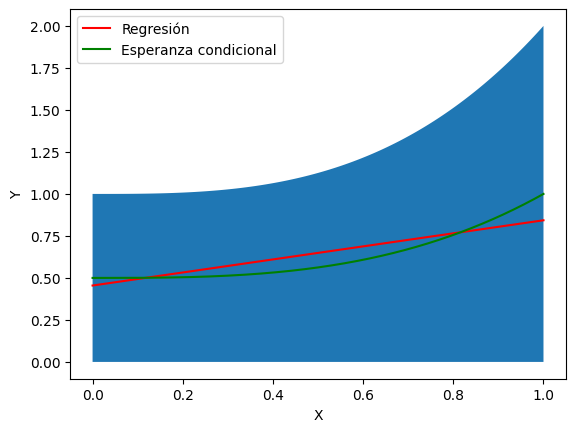

In [3]:
# Dominio para x e y
x_domain = np.linspace(0, 1, 1000)
y = np.array([1+x**3 for x in x_domain])

recta_regresion = np.array([40/103 * x + 2623/5768 for x in x_domain])
esperanza_cond = np.array([(1+x**3)/2 for x in x_domain])

plt.fill_between(x_domain, y)
plt.plot(x_domain, recta_regresion, label='Regresión', color='red')
plt.plot(x_domain, esperanza_cond, label='Esperanza condicional', color='green')
plt.ylabel('Y')
plt.xlabel('X')
plt.legend()
plt.show()



# Ejercicio 4

![](Enunciados/ej_4.png)

-------------------------- Item A y B --------------------------
m =  1.1930336441895935 b =  -3.8957808783118555
MSE:  8.953942751950358


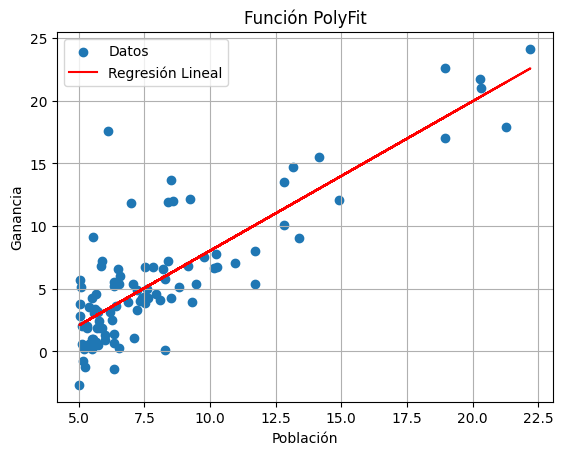

m =  1.1930336441895943 b =  -3.8957808783118595
MSE:  8.953942751950356


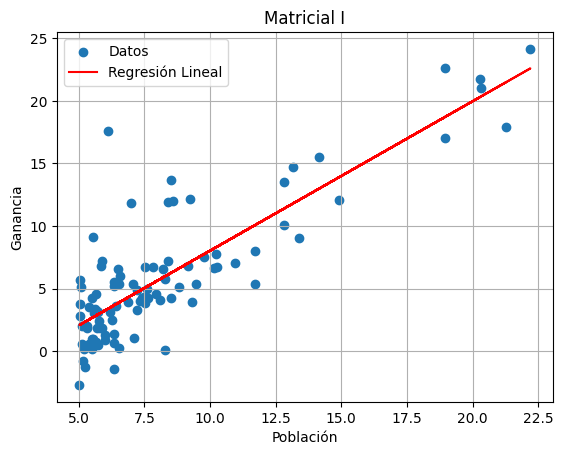

m =  1.1930336441895957 b =  -3.8957808783118772
MSE:  8.953942751950358


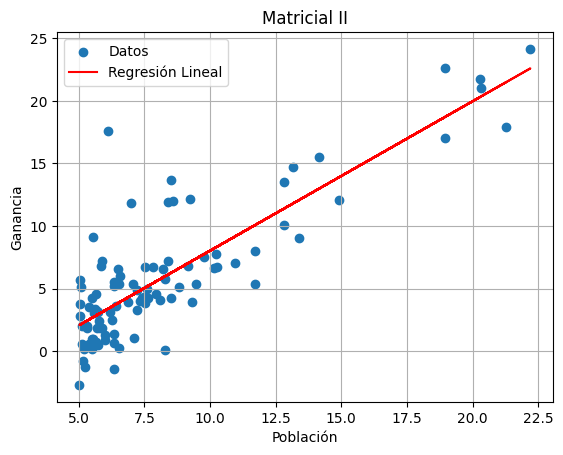

-------------------------- Item C --------------------------
El valor de w que minimiza el costo es: 1.1818181818181817
El valor de b que minimiza el costo es: -3.737373737373738


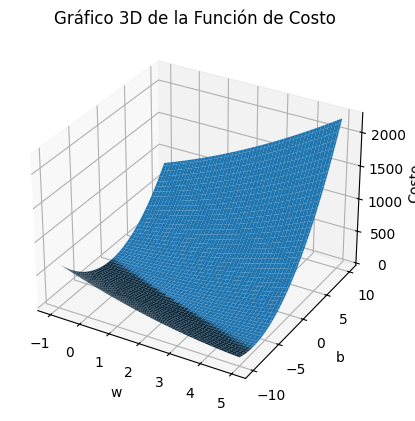

-------------------------- Item D --------------------------
La ganancia estimada para una población de 35000 habitantes es: 2798.3687635170763
-------------------------- Item E --------------------------
m LinearRegression = 1.1930336441895937
b LinearRegression = -3.895780878311852


In [9]:
data = np.loadtxt('data/mc.txt', delimiter=',')

# -------------------------- Item A y B --------------------------
print("-------------------------- Item A y B --------------------------")

# Item A PolyFit: Ajuste lineal usando la función polyfit de numpy
# Extraer las columnas de datos: X (población) y Y (ganancia)
X = data[:, 0]
Y = data[:, 1]

# Ajuste lineal utilizando polyfit (pendiente 'm' e intersección 'b')
m, b = np.polyfit(X, Y, 1)
print("m = ", m, "b = ", b)

# Predecir Y utilizando la fórmula de la recta Y = mX + b
Y_pred = m * data[:, 0] + b

# Calcular el Error Cuadrático Medio (MSE) entre Y y Y_pred
mse = np.mean((Y - Y_pred) ** 2)
print("MSE: ", mse)

# Graficar los datos y la línea de regresión ajustada
plt.scatter(X, Y, label='Datos')
plt.plot(X, Y_pred, color='red', label='Regresión Lineal')
plt.grid(True)
plt.title('Función PolyFit')
plt.ylabel('Ganancia')
plt.xlabel('Población')
plt.legend()
plt.show()

# Item A Matricial
# Número de puntos
n = len(X)

# Cálculos para la pendiente (m) y la intersección (b)
sum_X = np.sum(X)
sum_Y = np.sum(Y)
sum_XY = np.sum(X * Y)
sum_X2 = np.sum(X ** 2)

# Calcular pendiente 'm' e intersección 'b' usando las fórmulas matriciales
m = (n * sum_XY - sum_X * sum_Y) / (n * sum_X2 - sum_X ** 2)
b = (sum_Y - m * sum_X) / n

# Predecir Y usando la fórmula matricial
Y_pred_matriz = m * X + b

# Calcular el MSE para este método
mse_matriz = np.mean((Y - Y_pred_matriz) ** 2)
print("m = ", m, "b = ", b)
print("MSE: ", mse_matriz)

plt.scatter(X, Y, label='Datos')
plt.plot(X, Y_pred_matriz, color='red', label='Regresión Lineal')
plt.grid(True)
plt.title('Matricial I')
plt.ylabel('Ganancia')
plt.xlabel('Población')
plt.legend()
plt.show()

# Item A Matricial II: Método matricial usando álgebra lineal

# Preparar la matriz X añadiendo una columna de 1s para la intersección
X = np.vstack((np.ones_like(data[:, 0]), data[:, 0])).T

# Calcular los coeficientes (w) usando la fórmula matricial para la regresión lineal
w = np.linalg.inv(X.T @ X) @ X.T @ data[:, 1]

# Predecir Y utilizando los coeficientes obtenidos
Y_pred_matriz_II = X @ w

# Calcular el Error Cuadrático Medio (MSE)
mse_matriz_II = np.mean((Y - Y_pred_matriz_II) ** 2)
print("m = ", w[1], "b = ", w[0])
print("MSE: ", mse_matriz_II)

plt.scatter(X[:, 1], Y, label='Datos')
plt.plot(X[:, 1], Y_pred_matriz_II, color='red', label='Regresión Lineal')
plt.grid(True)
plt.title('Matricial II')
plt.ylabel('Ganancia')
plt.xlabel('Población')
plt.legend()
plt.show()

# -------------------------- Item C --------------------------
print("-------------------------- Item C --------------------------")
n = 100
rango_w = np.linspace(-1, 5, 100)   # Rango de valores para w (pendiente)
rango_b = np.linspace(-10, 10, 100) # Rango de valores para b (intersección)

# grid de valores para w y b
W, B = np.meshgrid(rango_w, rango_b)
costo = np.zeros((n, n))    # Matriz para almacenar los valores de costo
costo_minimo = np.inf   # Inicializar el costo mínimo como infinito
w_min = 0   # Inicializar w que minimiza el costo
b_min = 0   # Inicializar b que minimiza el costo

# Iterar sobre los valores de w y b, calculando el costo para cada combinación
for i in range(n):
    for j in range(n):
        Y_pred = rango_w[i] * X[:, 1] + rango_b[j]  # Predecir Y con la combinación de w y b
        costo[i, j] = np.mean((Y - Y_pred) ** 2)    # Calcular el MSE
        if costo[i, j] < costo_minimo:  # Actualizar el mínimo si se encuentra uno menor
            costo_minimo = costo[i, j]
            w_min = rango_w[i]
            b_min = rango_b[j]

# Mostrar el valor de w y b que minimiza el costo
print(f"El valor de w que minimiza el costo es: {w_min}")
print(f"El valor de b que minimiza el costo es: {b_min}")

# Gráfico 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W, B, costo)
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Costo')
plt.title('Gráfico 3D de la Función de Costo')
plt.show()

# -------------------------- Item D --------------------------
print("-------------------------- Item D --------------------------")
poblacion = 35000
ganancia_estimada = (w[1] * poblacion/1e4 + w[0]) * 1e4

print(f"La ganancia estimada para una población de 35000 habitantes es: {ganancia_estimada}")

# -------------------------- Item E --------------------------
print("-------------------------- Item E --------------------------")

# Usar la clase LinearRegression de scikit-learn para ajustar el modelo
regresion_lineal = LinearRegression()
regresion_lineal.fit(X[:, 1].reshape(-1, 1), Y) # Ajustar el modelo

# Obtener la pendiente (w) y la intersección (b) del modelo ajustado
w = regresion_lineal.coef_
b = regresion_lineal.intercept_

print(f"m LinearRegression = {w[0]}")
print(f"b LinearRegression = {b}")

# Ejercicio 5

![](Enunciados/ej_5.png)

In [12]:
# Leer el archivo CSV
df = pd.read_csv('data/molinos.csv')

# -------------------------- Item A --------------------------
print("-------------------------- Item A --------------------------")
# Seleccionar todas las columnas que comienzan con "P_"
potencias = [col for col in df.columns if col.startswith('P_')]

# Obtengo los valores de las columnas
valores_potencias = df[potencias].values

print("# Valores Negativos en las potencias:")
print(sum(valores_potencias < 0))

# SimpleImputer es generalmente utilizado para reemplazar valores faltantes (NaN)
# Reemplazo primero los valores negativos por NaN
valores_potencias[valores_potencias < 0] = np.nan

# Imputar los valores NaN con el promedio de la columna
imputer = SimpleImputer(strategy='mean')
potencias_arregladas = imputer.fit_transform(valores_potencias)

print("# Valores Negativos en las potencias después de arreglar:")
print(sum(potencias_arregladas < 0))

# -------------------------- Item B --------------------------
print("-------------------------- Item B --------------------------")
# Extraer las columnas 'Direction' (dirección del viento) y 'Velocity' (velocidad del viento)
direccion = df["Direction"]
velocidad = df["Velocity"]

# Norte = 0. y = cos(0) = 1, x = sin(0) = 0
velocidad_cartesianas = np.array([np.sin(np.radians(direccion)) * velocidad, np.cos(np.radians(direccion)) * velocidad]).T

print("Velocidades")
print(velocidad_cartesianas)

# -------------------------- Item C --------------------------
print("-------------------------- Item C --------------------------")
regresor_lineal = LinearRegression()

# Utilizar MultiOutputRegressor para entrenar un regresor que predice múltiples salidas (componentes x e y de la velocidad)
regresor_multi = MultiOutputRegressor(regresor_lineal)

# Ajustar el modelo con las potencias corregidas como entrada y las velocidades cartesianas como salida
regresor_multi.fit(potencias_arregladas, velocidad_cartesianas)

# -------------------------- Item D --------------------------
print("-------------------------- Item D --------------------------")
# Calcular el error cuadrático medio (MSE) entre las velocidades reales y las predichas por el modelo
mse = mean_squared_error(velocidad_cartesianas, regresor_multi.predict(potencias_arregladas))
print("MSE: ", round(mse, 3))

# La función mean_squared_error tiene la forma de 
# sklearn.metrics.mean_squared_error(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average', squared='deprecated')
# si se llama por defecto, el valor de multioutput es 'uniform_average', que calcula el MSE para cada salida y luego promedia los resultados.
# Si quisiera valores individuales, debería pasar 'raw_values' a multioutput.


-------------------------- Item A --------------------------
# Valores Negativos en las potencias:
[10239  9532 10893 11672 12714 12193 12194 11591 11705 12236 11201 10885
 12781 12218 11453 13109 13052 10269 10538 12088 11833 11441 12083 12330
 11511 13884 12038 12352 12236 10930  8642  9799  9575 10570 10222 11158
 11192 12215 11646 11891 11732 12363 11890]
# Valores Negativos en las potencias después de arreglar:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]
-------------------------- Item B --------------------------
Velocidades
[[-11.91617381  -2.10114295]
 [-10.38162632  -2.97688344]
 [ -8.03295995  -2.45592232]
 ...
 [ -0.39220084   4.48287614]
 [ -0.48747737   3.97018461]
 [ -0.34862297   3.98477879]]
-------------------------- Item C --------------------------
-------------------------- Item D --------------------------
MSE:  22.038


# Ejercicio 6

![](Enunciados/ej_6.png)

-------------------------- Item A --------------------------
Cantidad de muestras:  20640
Cantidad de features:  10

Feature y tipo de dato:
longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object
-------------------------- Item B --------------------------

Variables categóricas:
Index(['ocean_proximity'], dtype='object')

Probabilidad de que una propiedad sea de cada tipo:
ocean_proximity
<1H OCEAN     0.442636
INLAND        0.317393
NEAR OCEAN    0.128779
NEAR BAY      0.110950
ISLAND        0.000242
Name: proportion, dtype: float64
-------------------------- Item C --------------------------
-------------------------- Item D --------------------------
Cantidad de valores NaN: 207
Cantidad de valores NaN después de arreglar: 0
--

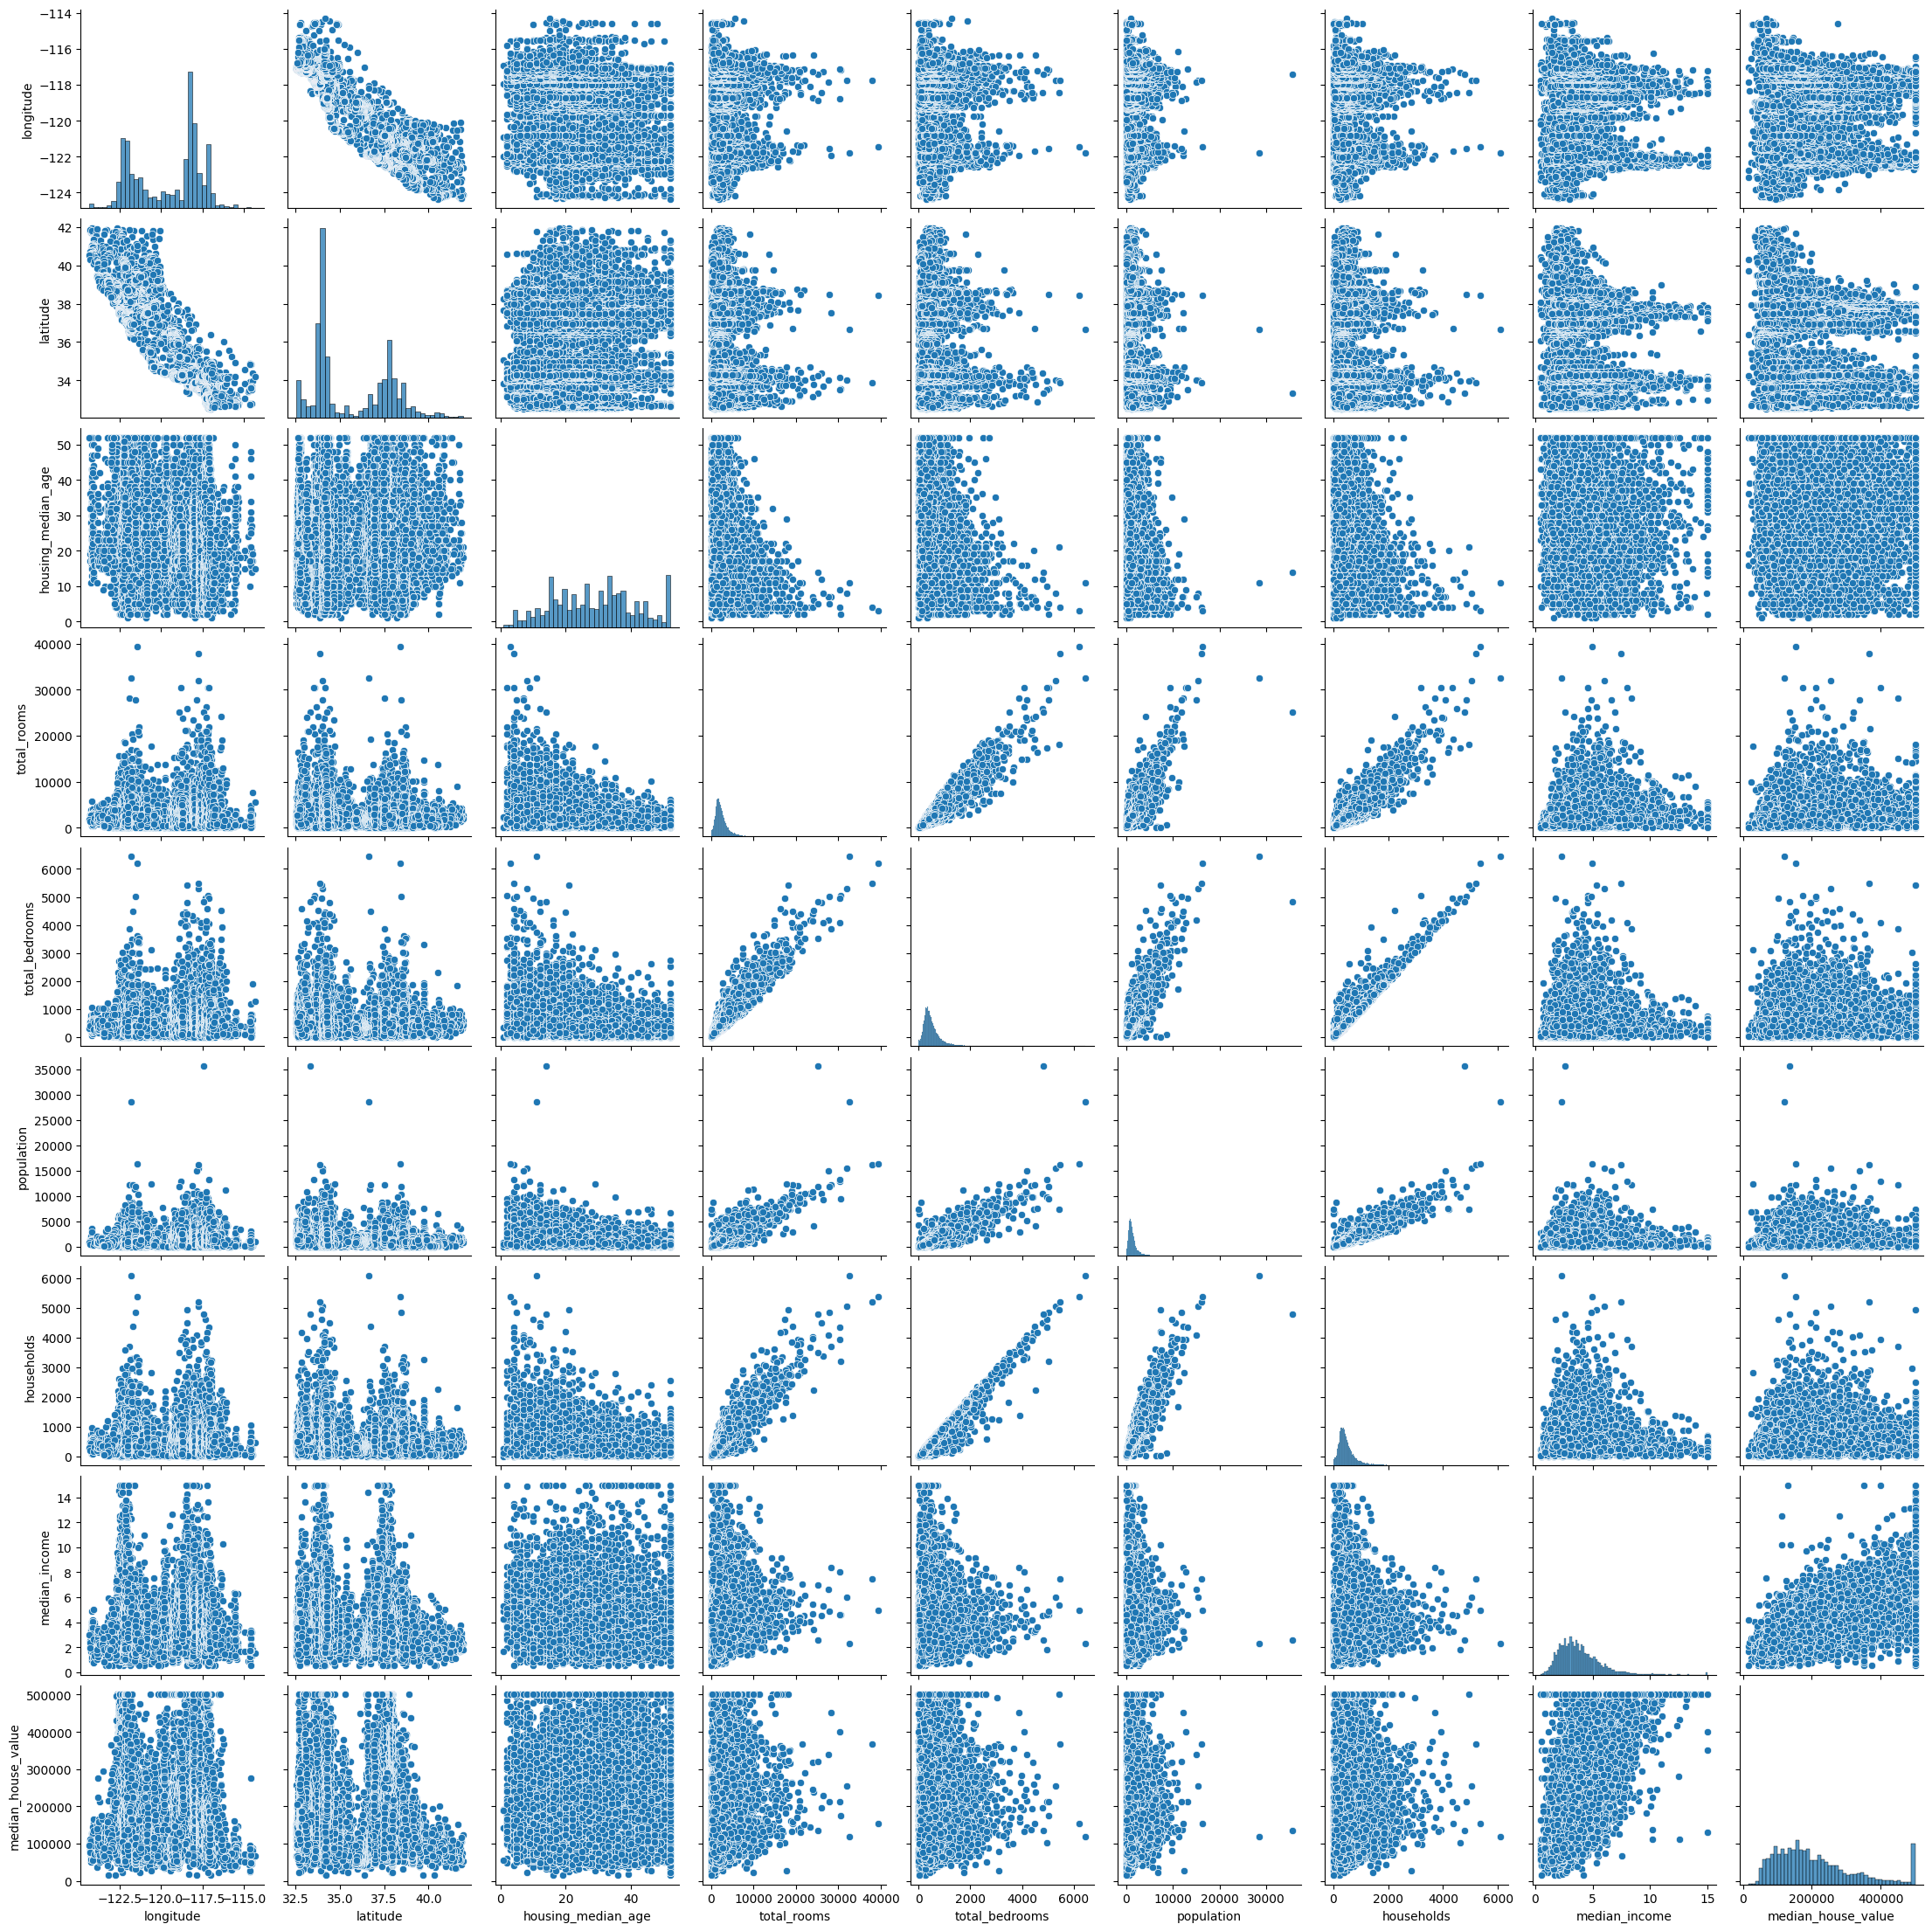

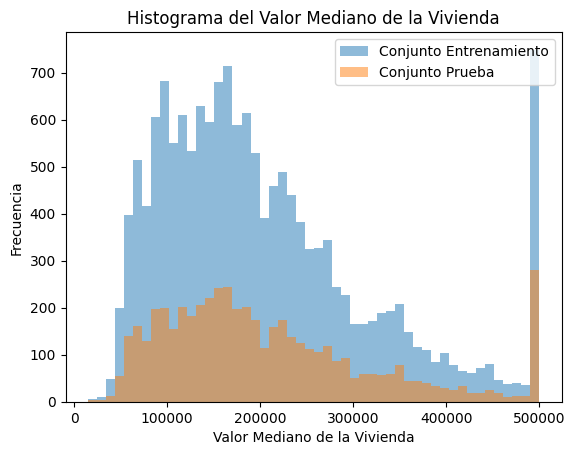

In [13]:
# -------------------------- Item A --------------------------
print("-------------------------- Item A --------------------------")
datos = pd.read_csv('data/inmobiliaria.csv')

print(f"Cantidad de muestras: ", datos.shape[0])
print(f"Cantidad de features: ", datos.shape[1])
print(f"\nFeature y tipo de dato:")
print(datos.dtypes)

# -------------------------- Item B --------------------------
print("-------------------------- Item B --------------------------")
# Obtengo las variables categóricas
categoricas = datos.select_dtypes(include=['object']).columns
print(f"\nVariables categóricas:")
print(categoricas)
    
# Obtengo la probabilidad de que una propiedad sea de cada tipo
print(f"\nProbabilidad de que una propiedad sea de cada tipo:")
for col in categoricas:
    print(datos[col].value_counts(normalize=True))
    
# value_counts(): Cuenta la frecuencia de cada valor único en la columna.
# normalize=True: En lugar de contar las frecuencias absolutas, devuelve la proporción (probabilidad) de cada valor en la columna.

# -------------------------- Item C --------------------------
print("-------------------------- Item C --------------------------")
sns.pairplot(datos)

# Se generan nxn gráficos de dispersión (siendo n la cantidad de variables numéricas) visualizando la relación entre 
# cada par de variables numéricas del data frame. Sobre la diagonal principal se visualizan los histogramas de cada variable.
# Esto permite detectar posibles correlaciones entre las variables.

# -------------------------- Item D --------------------------
print("-------------------------- Item D --------------------------")
# imputer.fit_transform(df): Ajusta el imputador a los datos en df y luego transforma df reemplazando los valores faltantes con el valor más frecuente de cada columna.
# fit(): Calcula el valor más frecuente en cada columna del DataFrame.
# transform(): Reemplaza los valores faltantes en cada columna con el valor más frecuente calculado.
# pd.DataFrame(...): Convierte el resultado de la transformación (que es un array de numpy) de nuevo en un DataFrame, usando los nombres de las columnas originales de df.

imputer = SimpleImputer(strategy='most_frequent')
datos_arreglados = pd.DataFrame(imputer.fit_transform(datos), columns=datos.columns)

# https://www.atlassian.com/data/notebook/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe?utm_source=gdn&utm_medium=paid-display&campaign=21252494340&adgroup=&device=c&devicemodel=&placement=&aceid=&creative=&adtype=&gclid=CjwKCAjwodC2BhAHEiwAE67hJKZ-GHEDLdKbL8WQpeP58T3rSphI2vcxNmq3uJAZJqoxf_Gtbwf2vhoCztgQAvD_BwE&country=&network=x&targetid=&gad_source=1
print(f"Cantidad de valores NaN: {datos.isnull().sum().sum()}")
print(f"Cantidad de valores NaN después de arreglar: {datos_arreglados.isnull().sum().sum()}")

# -------------------------- Item E --------------------------
print("-------------------------- Item E --------------------------")
# One-Hot Encoding: Cada categoría en una columna categórica se convierte en una columna binaria (0 o 1).
data_dummies = pd.get_dummies(datos_arreglados, columns=categoricas)
print("\nData Dummies:")
print(data_dummies.dtypes)

# -------------------------- Item F --------------------------
print("-------------------------- Item F --------------------------")
# El comando train_test_split de scikit-learn se utiliza para dividir un conjunto de datos 
# en dos conjuntos distintos: uno para entrenamiento y otro para prueba (o validación). 
# X: Array-like o DataFrame de características (features) que quieres dividir.
# y: Array-like o Series de etiquetas (targets) que quieres dividir (si estás realizando un problema de clasificación o regresión).
# test_size: Proporción o número absoluto del conjunto de datos que se usará como conjunto de prueba. Puede ser un número entre 0 y 1 (proporción) o un entero (número absoluto de muestras).
# train_size: Proporción o número absoluto del conjunto de datos que se usará como conjunto de entrenamiento. Si se especifica test_size, train_size se ajusta automáticamente.
# random_state: Semilla para el generador de números aleatorios, lo que asegura que la división sea reproducible. Si se especifica, obtendrás la misma división cada vez que ejecutes el código.
# shuffle: Si es True (por defecto), los datos se barajan antes de la división. Puedes establecerlo en False si no quieres barajar los datos.

data_entrenamiento, data_prueba = train_test_split(data_dummies, test_size=0.25, random_state=40)

# Histogramas (bins: cantidad de barras, alpha: transparencia)
fig = plt.figure()
plt.hist(data_entrenamiento['median_house_value'], bins=50, alpha=0.5, label='Conjunto Entrenamiento')
plt.hist(data_prueba['median_house_value'], bins=50, alpha=0.5, label='Conjunto Prueba')
plt.xlabel('Valor Mediano de la Vivienda')
plt.ylabel('Frecuencia')
plt.title('Histograma del Valor Mediano de la Vivienda')
plt.legend()

# -------------------------- Item G --------------------------
print("-------------------------- Item G --------------------------")
scaler = StandardScaler()

# Saco la columna 'median_house_value' de los dos conjuntos para X
x_entrenamiento = data_entrenamiento.drop(columns='median_house_value')
x_prueba = data_prueba.drop(columns='median_house_value')

# Guardo la columna 'median_house_value' en y
y_entrenamiento = data_entrenamiento['median_house_value']
y_prueba = data_prueba['median_house_value']

scaler.fit(x_entrenamiento)
x_entrenamiento_norm = scaler.transform(x_entrenamiento)
x_prueba_norm = scaler.transform(x_prueba)

# -------------------------- Item H --------------------------
print("-------------------------- Item H --------------------------")
regresor_lineal = LinearRegression()

# Entrenar el modelo
regresor_lineal.fit(x_entrenamiento_norm, y_entrenamiento)

# Predecir los valores de y
y_pred_entrenamiento = regresor_lineal.predict(x_entrenamiento_norm)
y_pred_prueba = regresor_lineal.predict(x_prueba_norm)

# Calcular el Error Cuadrático Medio (MSE)
mse_entrenamiento = mean_squared_error(y_entrenamiento, y_pred_entrenamiento)
mse_prueba = mean_squared_error(y_prueba, y_pred_prueba)

print(f"MSE en el conjunto de entrenamiento: ", round(mse_entrenamiento, 3))
print(f"MSE en el conjunto de prueba: ", round(mse_prueba, 3))


# Ejercicio 7

![](Enunciados/ej_7.png)

También conocida como "Ridge Regression" es aplicable en problemas de "Overfitting" en donde el modelo posee demasiados parámetros o características en relación a la cantidad de datos (o pensandolo al revés existe una falta de datos para entrenar el modelo) lo que puede conllevar a que sea suceptible a ruido o patrones indeseados. 

En este caso entra en juego la regularización L2, la cual penaliza grandes valores de los coeficientes ayudando a reducir la varianza del modelo y generando una suavización del mismo y que este sea menos complejo y menos propenso a sobreajustar los datos de entrenamiento.

<img src="imagenes/Overfitting.jpg" alt="image" style="width:600px; height:300px;"/>

*[1] Por lo tanto buscamos minimizar:

$$\hat{\beta}^{ridge} = \text{argmin}_\beta \left\{\sum_{i=1}^N \left(y_i - \beta_0 - \sum_{j=1}^p x_{ij} \beta_j \right)^2 + \lambda \sum_{j=1}^p {\beta_j}^2 \right\}$$

Trabajando matricialmente

$RSS(\lambda) = (\mathbf{y} - \mathbf{X}\beta)^T (\mathbf{y} - \mathbf{X}\beta) + \lambda \beta^T \beta \xrightarrow[distribuyendo]{} \ = \mathbf{y}^T\mathbf{y} - \mathbf{y}^T\mathbf{X}\beta  - \beta^T \mathbf{X}^T\mathbf{y} + \beta^T\mathbf{X}^T\mathbf{X}\beta + \lambda\beta^T\beta$

Para minimizar derivo e igualo a cero:

$\frac{\partial RSS(\lambda)}{\partial \beta} = -\mathbf{X}^T\mathbf{y} - \mathbf{X}^T\mathbf{y} + \beta (\mathbf{X}^T\mathbf{X} + \mathbf{X}\mathbf{X}^T) + 2\lambda\beta$

$\frac{\partial RSS(\lambda)}{\partial \beta} = -2\mathbf{X}^Ty + 2\mathbf{X}^T\mathbf{X}\beta + 2\lambda\beta = 0$

Despejando $\beta$ obtenemos los coeficientes como:

$\hat{\beta}^{ridge} = (\mathbf{X}^T\mathbf{X} + \lambda I)^{-1}\mathbf{X}^T \mathbf{y}$

Si el algoritmo está muy regularizado ($\lambda$ grande $\rightarrow \lambda I >> \mathbf{X}^T\mathbf{X}$) la solución se aproxima a:

$\beta \approx (\lambda I)^{-1}\mathbf{X}^T \mathbf{y} \xrightarrow[\lambda I \ diag]{} \beta \approx \frac{1}{\lambda} \mathbf{X}^T \mathbf{y}$

generando que los coeficientes sean más pequeños en magnitud ($\lambda$ grande) y el modelo va a ser más sencillo y menos propenso a overfitting pero se puede generar que este no sea capaz de aproximar a los datos correctamente.

Se termina asemejando a la solución de la recta de regresión.

[1] Trevor Hastie, Robert Tibshirani, Jerome Friedman. "The Elements of Statistical Learning Data Mining,Inference,and Prediction"


# Ejercicio 8

![](Enunciados/ej_8.png)

-------------------------- Item A --------------------------


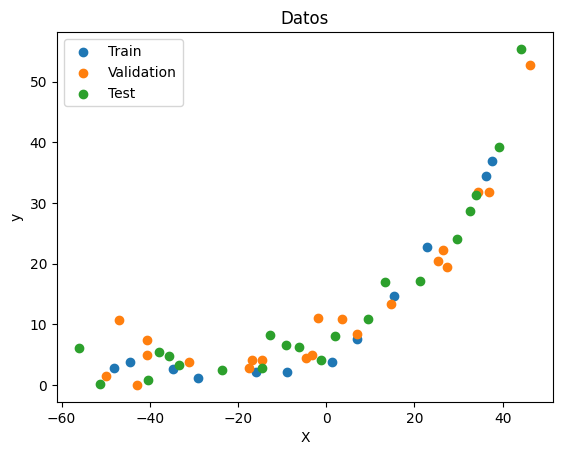

-------------------------- Item B --------------------------


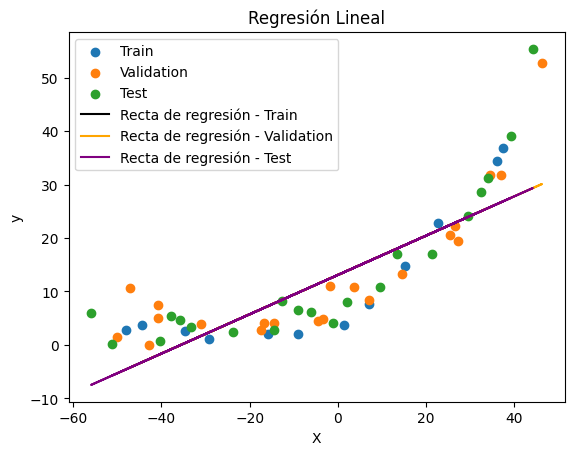

-------------------------- Item C --------------------------


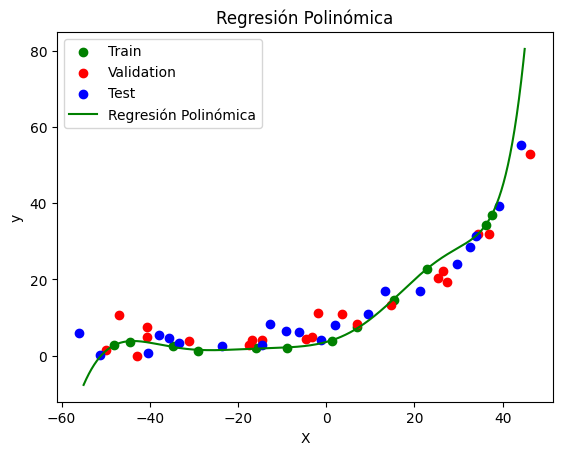

-------------------------- Item D --------------------------


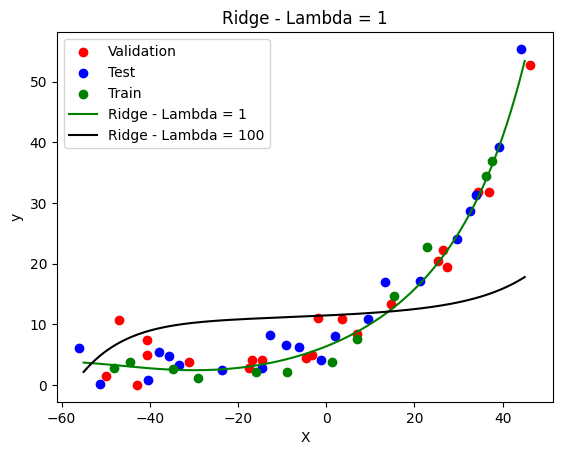

-------------------------- Item E --------------------------


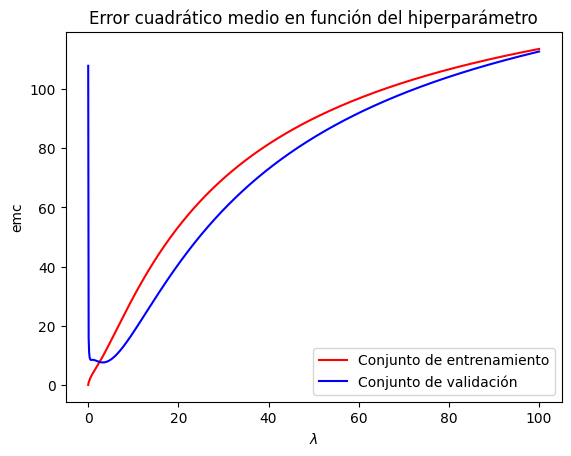

El minimo del EMC de validación se da para lambda =  [3.2032032]
-------------------------- Item F --------------------------
El EMC de test  para el lambda que minimiza es:  7.567369558004761


In [58]:
# -------------------------- Item A --------------------------
print("-------------------------- Item A --------------------------")
datos = pd.read_csv('data/represa.csv')


Xtrain = datos['Xtrain'].dropna().values.reshape(-1, 1)
ytrain = datos['ytrain'].dropna().values.reshape(-1, 1)
Xval = datos['Xval'].values.reshape(-1, 1)
yval = datos['yval'].values.reshape(-1, 1)
Xtest = datos['Xtest'].values.reshape(-1, 1)
ytest = datos['ytest'].values.reshape(-1, 1)

plt.figure()
plt.scatter(Xtrain, ytrain, label='Train')
plt.scatter(Xval, yval, label='Validation')
plt.scatter(Xtest, ytest, label='Test')
plt.legend()
plt.title('Datos')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

# -------------------------- Item B --------------------------
print("-------------------------- Item B --------------------------")
regresor_lineal = LinearRegression()
regresor_lineal.fit(Xtrain, ytrain) # Entrenar el modelo

# Predecir los valores de y
y_pred_train = regresor_lineal.predict(Xtrain)
y_pred_val = regresor_lineal.predict(Xval)
y_pred_test = regresor_lineal.predict(Xtest)

plt.figure()
plt.scatter(Xtrain, ytrain, label='Train')
plt.scatter(Xval, yval, label='Validation')
plt.scatter(Xtest, ytest, label='Test')
plt.plot(Xtrain, y_pred_train, color='black', label='Recta de regresión - Train')
plt.plot(Xval, y_pred_val, color='orange', label='Recta de regresión - Validation')
plt.plot(Xtest, y_pred_test, color='purple', label='Recta de regresión - Test')
plt.legend()
plt.title('Regresión Lineal')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

# -------------------------- Item C --------------------------
print("-------------------------- Item C --------------------------")
# Crear el transformador PolynomialFeatures de grado 8
polynomial_features = PolynomialFeatures(degree=8)

# Transformar las características de entrenamiento, validación y test
# El resultado es una matriz con las características originales y todas las 
# combinaciones posibles de las características originales hasta el grado 8.
Xtrain_poly = polynomial_features.fit_transform(Xtrain)
Xval_poly = polynomial_features.transform(Xval)
Xtest_poly = polynomial_features.transform(Xtest)

# NORMALIZAR
scaler = StandardScaler()
scaler.fit(Xtrain_poly)
Xtrain_poly = scaler.transform(Xtrain_poly)
Xval_poly = scaler.transform(Xval_poly)
Xtest_poly = scaler.transform(Xtest_poly)

regresor_polinomico = LinearRegression()    # Crear el modelo de regresión lineal
regresor_polinomico.fit(Xtrain_poly, ytrain)    # Entrenar el modelo con las características polinómicas

# Predecir los valores de y
y_pred_train_poly = regresor_polinomico.predict(Xtrain_poly)
y_pred_val_poly = regresor_polinomico.predict(Xval_poly)
y_pred_test_poly = regresor_polinomico.predict(Xtest_poly)

# Defino el eje del gráfico
eje_x = np.linspace(-55, 45, 1000).reshape(-1, 1)
eje_x_poly = polynomial_features.transform(eje_x)
eje_x_poly = scaler.transform(eje_x_poly)

# Predecir los valores de y para el eje x
y_pred = regresor_polinomico.predict(eje_x_poly)

plt.figure()
plt.scatter(Xtrain, ytrain, label='Train', color='green')
plt.scatter(Xval, yval, label='Validation', color='red')
plt.scatter(Xtest, ytest, label='Test', color='blue')
plt.plot(eje_x, y_pred, color='green', label='Regresión Polinómica')
plt.legend()
plt.title('Regresión Polinómica')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

# -------------------------- Item D --------------------------
print("-------------------------- Item D --------------------------")
# Regresión lambda = 1
ridge_1 = Ridge(alpha = 1)
ridge_1.fit(Xtrain_poly, ytrain)
y_ridge_1 = ridge_1.predict(eje_x_poly)

# Regresión lambda = 100
ridge_100 = Ridge(alpha = 100)
ridge_100.fit(Xtrain_poly, ytrain)
y_ridge_100 = ridge_100.predict(eje_x_poly)

plt.figure()
plt.scatter(Xval, yval, label='Validation', color='red')
plt.scatter(Xtest, ytest, label='Test', color='blue')
plt.scatter(Xtrain, ytrain, label='Train', color='green')
plt.plot(eje_x, y_ridge_1, color='green', label='Ridge - Lambda = 1')
plt.plot(eje_x, y_ridge_100, color='black', label='Ridge - Lambda = 100')
plt.legend()
plt.title('Ridge - Lambda = 1')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

# -------------------------- Item E --------------------------
print("-------------------------- Item E --------------------------")
lambda_parameter = np.linspace(0, 100, 1000).reshape(-1, 1)
emc_entrenamiento = np.zeros((1000, 1))
emc_validacion = np.zeros((1000, 1))

for i in range(1000):
    ridge = Ridge(alpha = lambda_parameter[i])
    ridge.fit(Xtrain_poly, ytrain)
    y_hat = ridge.predict(Xtrain_poly)
    emc_entrenamiento[i] = np.mean((y_hat - ytrain)**2)
    y_hat = ridge.predict(Xval_poly)
    emc_validacion[i] = np.mean((y_hat - yval)**2)
    
plt.plot(lambda_parameter, emc_entrenamiento, label='Conjunto de entrenamiento', color='red')
plt.plot(lambda_parameter, emc_validacion, label='Conjunto de validación', color='blue')
plt.xlabel('$\lambda$')
plt.ylabel('emc')
plt.legend()
plt.title('Error cuadrático medio en función del hiperparámetro')
plt.show()

minimo_validacion = np.argmin(emc_validacion)
print("El minimo del EMC de validación se da para lambda = ", lambda_parameter[minimo_validacion])

# -------------------------- Item F --------------------------
print("-------------------------- Item F --------------------------")

ridge = Ridge(alpha = lambda_parameter[minimo_validacion])
ridge.fit(Xtrain_poly, ytrain)
y_hat = ridge.predict(Xtest_poly)
emc_test = np.mean((y_hat - ytest)**2)

print("El EMC de test  para el lambda que minimiza es: ", emc_test)
